# DR1 COCO Example

##### Setup

In [43]:
import os
import sys
import numpy as np
import astropy

from astropy.table import Table 

import matplotlib
import matplotlib.pyplot as pl

pl.rcParams['figure.figsize'] = (4,4)
pl.rcParams['font.family'] = 'serif'

from matplotlib import gridspec

%config InlineBackend.figure_format="retina"
%config Completer.use_jedi = False
%matplotlib inline

The data from Zenodo is required; the following directory is the location of the unpacked data.

In [2]:
DATADIR = './'
!ls $DATADIR

dr1_example.ipynb


##### Read the `galaxies.fits` table

In [17]:
galaxies = Table.read('galaxies.fits')
print('{:d} entries in galaxies table for this data release'.format(len(galaxies)))

6414 entries in galaxies table for this data release


In [18]:
galaxies[0:3]

SUBHALOINDEX,NTAGS,MSTAR_TAGS,DHALO_MASS,DHALO_ISDHALOCENTRE,DHALO_ISFOFCENTRE,DHALO_MAINBRANCHMAXIMUMNP,DHALO_MAINBRANCHMAXIMUMVMAX,DHALO_PROXY_R200,SUB_FOFNR,SUB_MCRIT200,SUB_RCRIT200,SUB_COM,SUB_POS,SUB_VEL,SUB_VDISP,SUB_VMAX,SUB_MBID,IDIR,_IGAL
int64,int64,float32,float32,int32,int32,int32,float32,float32,int32,float32,float32,float32[3],float32[3],float32[3],float32,float32,int64,int32,int64
0,137344664,192531320000.0,22663257000000.0,1,1,140481978,430.56668,581.5398,0,21885337000000.0,574.86066,54.240902 .. 33.528538,54.229576 .. 33.5232,86.72749 .. -128.42062,259.88834,430.56668,1197346885652,52,0
2,3660018,4838672400.0,382672400000.0,1,0,2794612,138.95985,149.19275,0,-1.0,-1.0,55.135036 .. 33.47062,55.135086 .. 33.475456,-104.10903 .. 88.85606,71.39387,128.15775,3226096806723,23,2
3,1952253,704482300.0,170247080000.0,1,0,1370105,111.748474,113.8934,0,-1.0,-1.0,54.375214 .. 34.14344,54.375263 .. 34.13919,-122.71274 .. -445.9713,56.03632,97.79275,3226180873124,24,3


##### Examine the SMHM relation for the galaxies in this release

Notice we don't need any 'corrections' for the Hubble parameter ("little h") when reading the data from the table.

In [57]:
# Log10 stellar mass for each galaxy
lmstar = np.log10(galaxies['MSTAR_TAGS'])

# log10 virial mass (~M200) for each galaxy
lmvir = np.log10(galaxies['DHALO_MASS'])

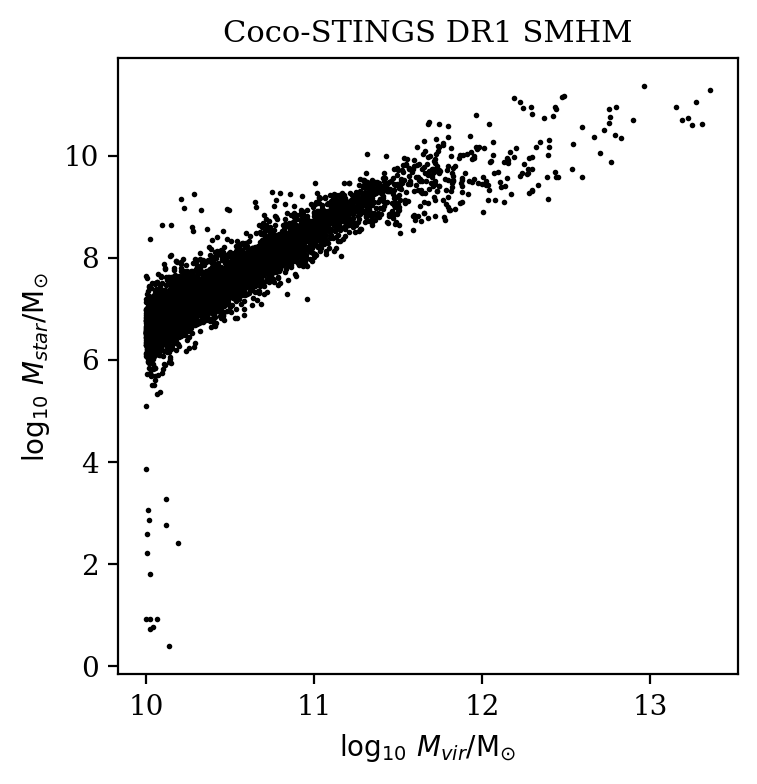

In [58]:
pl.scatter(lmvir,lmstar,s=1,c='k')
pl.title('Coco-STINGS DR1 SMHM',fontsize=11)
pl.xlabel('$\log_{10}\,M_{vir}/\mathrm{M_{\odot}}$')
pl.ylabel('$\log_{10}\,M_{star}/\mathrm{M_{\odot}}$');

We can see that this release is cut at $M_\mathrm{vir}\sim10^{10}\,\mathrm{M_{\odot}}$ and contains only central galaxies.

##### Select MW analogues by stellar mass

In [84]:
# Log10 stellar mass for each galaxy
lmstar = np.log10(galaxies['MSTAR_TAGS'])

# log10 virial mass (~M200) for each galaxy
lmvir = np.log10(galaxies['DHALO_MASS'])

In [85]:
MW_LOG_MSTAR_LO = 10.6
MW_LOG_MSTAR_HI = 10.9

is_mw_by_mstar = (lmstar >= MW_LOG_MSTAR_LO) & (lmstar < MW_LOG_MSTAR_HI)
print('{:d} galaxies selected as MW analogues by stellar mass'.format(is_mw_by_mstar.sum()))
print('Indices in galaxies table:', np.flatnonzero(is_mw_by_mstar))
print()
print(galaxies[is_mw_by_mstar])

14 galaxies selected as MW analogues by stellar mass
Indices in galaxies table: [ 25  35  64  78  93  97 154 175 200 225 259 309 452 460]

SUBHALOINDEX   NTAGS     MSTAR_TAGS  ...    SUB_MBID   IDIR _IGAL
------------ --------- ------------- ... ------------- ---- -----
       70785 134472892 41226520000.0 ... 3242152806937   37  1330
       98766  78681858 55027860000.0 ... 1147484092047   47  1898
      202269 104397340 48808000000.0 ... 1100640828686   86  3545
      242754  39681498 49545750000.0 ... 3201240932387   87  4222
      296558  44269135 56243690000.0 ... 1236879036654   54  5177
      303625  39679410 43927044000.0 ... 1157002993590   90  5322
      403717  19919842 58721645000.0 ... 1175417029145   45  6983
      424148  17346202 53661258000.0 ... 1204530159871   71  7316
      452986  15024330 66657870000.0 ... 1032729878150   50  7796
      484544   5468303 41401610000.0 ... 1048037673383   83  8289
      523429   8253020 41339826000.0 ... 1194326156284   84  8890
   

Let's examine one of these, identified by a particular index into `galaxies.fits`:

In [98]:
target_mw_idx = 7
target_row = np.flatnonzero(is_mw_by_mstar)[target_mw_idx]

galaxies[target_row]

SUBHALOINDEX,NTAGS,MSTAR_TAGS,DHALO_MASS,DHALO_ISDHALOCENTRE,DHALO_ISFOFCENTRE,DHALO_MAINBRANCHMAXIMUMNP,DHALO_MAINBRANCHMAXIMUMVMAX,DHALO_PROXY_R200,SUB_FOFNR,SUB_MCRIT200,SUB_RCRIT200,SUB_COM,SUB_POS,SUB_VEL,SUB_VDISP,SUB_VMAX,SUB_MBID,IDIR,_IGAL
int64,int64,float32,float32,int32,int32,int32,float32,float32,int32,float32,float32,float32[3],float32[3],float32[3],float32,float32,int64,int32,int64
424148,17346202,53661258000.0,2325989300000.0,1,1,14418035,230.55923,272.2751,39,2208165300000.0,267.61044,58.833397 .. 54.060863,58.841022 .. 54.06198,-20.929178 .. 75.38329,121.685074,207.27174,1204530159871,71,7316


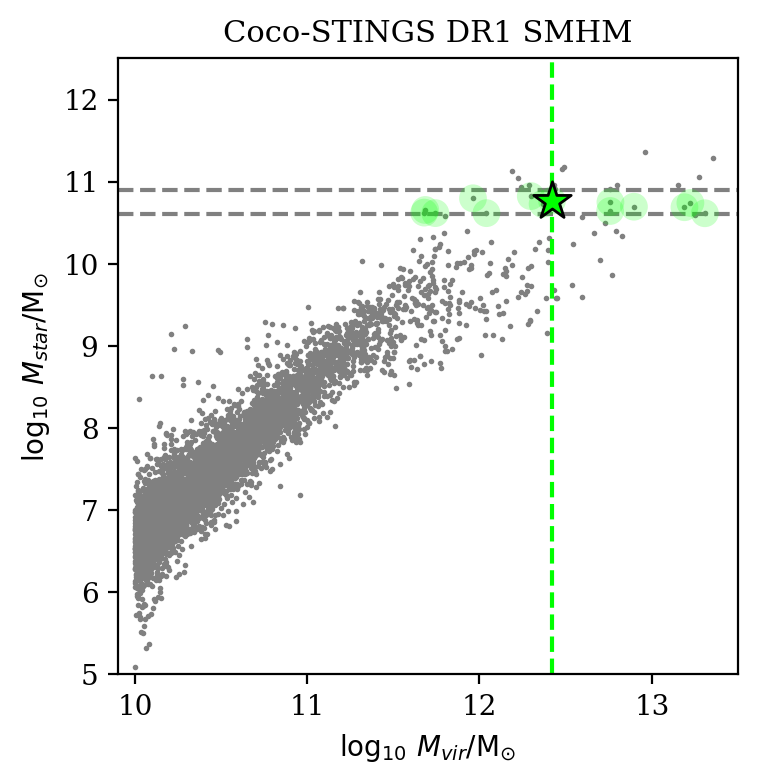

In [91]:
# Everything
pl.scatter(lmvir,lmstar,s=1,c='grey')
# Highlight MW analogues
pl.scatter(lmvir[is_mw_by_mstar],lmstar[is_mw_by_mstar],marker='o',s=100,c='lime',zorder=10,edgecolor='None',alpha=0.2)
# Highlight selected galaxy
pl.scatter(lmvir[target_row],lmstar[target_row],marker='*',s=200,c='lime',zorder=20,edgecolor='k')

pl.axhline(MW_LOG_MSTAR_HI,c='grey',ls='--')
pl.axhline(MW_LOG_MSTAR_LO,c='grey',ls='--')

pl.axvline(lmvir[target_row],c='lime',ls='--')

pl.xlim(9.9,13.5)
pl.ylim(5,12.5)
pl.title('Coco-STINGS DR1 SMHM',fontsize=11)
pl.xlabel('$\log_{10}\,M_{vir}/\mathrm{M_{\odot}}$')
pl.ylabel('$\log_{10}\,M_{star}/\mathrm{M_{\odot}}$');

This particular galaxy lives in a halo somewhat more massive than the MW. This galaxy is shown in the central panel of Fig. 1 in the paper.

##### Read the particle data

The following requires HDF5 command line tools and the `h5py` python package.

In [157]:
import h5py

Use the `galaxies.hdf5` table to determine the path to the particle data for this galaxy in the data release directories.

In [100]:
subdir    = 'dr1/cutouts/lacey16/3pc/0153/{:04d}'.format(galaxies[target_row]['IDIR'])
filename  = 'subhalo_{:d}_153.hdf5'.format(galaxies[target_row]['SUBHALOINDEX'])
full_path = os.path.join(DATADIR, subdir, filename)

print(full_path)

./dr1/cutouts/lacey16/3pc/0153/0071/subhalo_424148_153.hdf5


The data for this galaxy are under the subdirectory `0071`, so we will need at least the `0070_0075.tar.gz` file from Zenodo unpacked under `$DATADIR`. Assuming that is the case, we can inspect the file

In [158]:
!h5ls $full_path

Config                   Group
Header                   Group
Parameters               Group
PartType4                Group


In [159]:
!h5ls $full_path/PartType4

Coordinates              Dataset {19756582, 3}
DMIDs                    Dataset {19756582}
HSML                     Dataset {19756582}
LookbackFormed           Dataset {19756582}
Mass                     Dataset {19756582}
Mmetal                   Dataset {19756582}
ParticleIDs              Dataset {19756582}
SubhaloNr                Dataset {19756582}
TPSnapshot               Dataset {19756582}
Velocities               Dataset {19756582, 3}


We can read the data with h5py, converting coordinates in Mpc to kpc as we go.

In [130]:
with h5py.File(full_path) as f:
    xyz = f['/PartType4']['Coordinates'][:]*1000.0 # Convert Mpc to kpc
    mass = f['/PartType4']['Mass'][:]
    subnr = f['/PartType4']['SubhaloNr'][:]

The following cell reproduces the central panel of Fig. 1, using a simple histogram of mass **without** the adaptive kernel smoothing. The colour scale shows log10 of stellar mass surface density in Msol/kpc^2.

/tmp/ipykernel_20206/3103186794.py:11: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(surface_density), extent=extent,vmin=0,vmax=9)


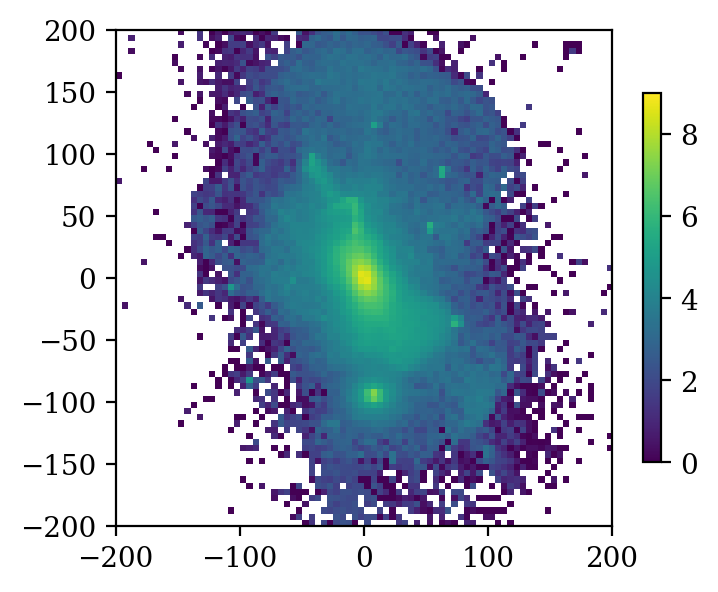

In [153]:
binsize_kpc = 5
area_bin_kpc2 = binsize_kpc**2
xbins = np.arange(-200,200+binsize_kpc,binsize_kpc)
ybins = np.arange(-200,200+binsize_kpc,binsize_kpc)

mass_per_bin,_x,_y = np.histogram2d(xyz[:,1],xyz[:,2], weights=mass, bins=(xbins,ybins));

surface_density = mass_per_bin / area_bin_kpc2

extent = [_x.min(),_x.max(),_y.min(),_y.max()]
pl.imshow(np.log10(surface_density), extent=extent,vmin=0,vmax=9)
pl.colorbar(shrink=0.6);

The following cell isolates stellar mass bound to the central potential (rather than satellites) by matching the particle `SubhaloNr` against the subhalo number associated with this galaxy.

/tmp/ipykernel_20206/1938877023.py:9: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(surface_density), extent=extent,vmin=0,vmax=9)


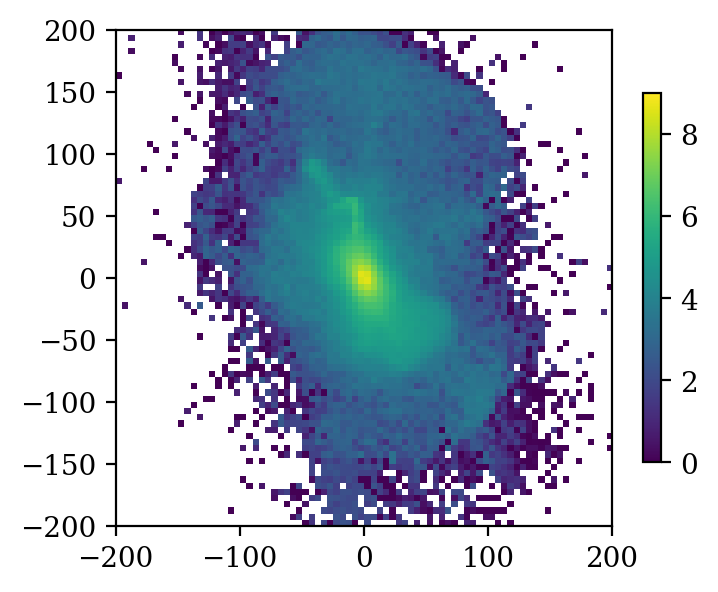

In [154]:
is_central = subnr == galaxies[target_row]['SUBHALOINDEX']

mass_per_bin,_x,_y = np.histogram2d(xyz[is_central,1],xyz[is_central,2], weights=mass[is_central], 
                                    bins=(xbins,ybins));

surface_density = mass_per_bin / area_bin_kpc2

extent = [_x.min(),_x.max(),_y.min(),_y.max()]
pl.imshow(np.log10(surface_density), extent=extent,vmin=0,vmax=9)
pl.colorbar(shrink=0.6);